# Data Visualizations for 2019-2020 Season (General) 

## Imports 

In [26]:
# important imports for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # library for interactive plots
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

pd.set_option('display.max_columns', None)

In [27]:
sns.set_palette('dark')
sns.set_style("darkgrid")

## Read in Dataset

In [28]:
url = "NBAplayerTotals2020.csv"

basketballData = pd.read_csv("./data/"+url)

In [29]:
basketballData.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26.0,OKC,58.0,58.0,1564.0,262.0,443.0,0.591,1.0,3.0,0.333,261.0,440.0,0.593,0.593,108.0,183.0,0.590,196.0,347.0,543.0,141.0,50.0,65.0,86.0,111.0,633.0,0.60,19.40,205.42,6.8,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,Bam Adebayo,PF,22.0,MIA,65.0,65.0,2235.0,408.0,719.0,0.567,1.0,13.0,0.077,407.0,706.0,0.576,0.568,236.0,342.0,0.690,165.0,518.0,683.0,333.0,78.0,85.0,185.0,164.0,1053.0,0.61,18.42,230.84,7.7,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,1754.0,391.0,793.0,0.493,61.0,157.0,0.389,330.0,636.0,0.519,0.532,158.0,191.0,0.827,103.0,289.0,392.0,129.0,36.0,87.0,74.0,128.0,1001.0,0.57,18.39,203.94,6.8,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,Nickeil Alexander-Walker,SG,21.0,NOP,41.0,0.0,501.0,77.0,227.0,0.339,40.0,117.0,0.342,37.0,110.0,0.336,0.427,17.0,28.0,0.607,8.0,72.0,80.0,74.0,11.0,7.0,40.0,46.0,211.0,0.44,8.87,-12.19,-0.4,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,Grayson Allen,SG,24.0,MEM,30.0,0.0,498.0,79.0,176.0,0.449,33.0,91.0,0.363,46.0,85.0,0.541,0.543,30.0,35.0,0.857,5.0,61.0,66.0,43.0,6.0,1.0,23.0,36.0,221.0,0.58,11.41,6.76,0.2,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1


## Initial Exploratory Data Analysis 

### Distribution Histograms 

In [30]:
fig = px.histogram(basketballData, x="G", marginal="box",
                   hover_data=basketballData.columns, barmode='overlay')
fig.update_layout(
    height=500,
    title_text='Games Played by 2019-2020 NBA Players',
    xaxis_title="Games Played",
    yaxis_title="Count",
)

fig.show()

In [31]:
fig = px.histogram(basketballData, x="Age", marginal="box",
                   hover_data=basketballData.columns, barmode='overlay')
fig.update_layout(
    height=500,
    title_text='Age of 2019-2020 NBA Players',
    xaxis_title="Player Age (Years)",
    yaxis_title="Count",
)

fig.show()

### Pairplots

In [32]:
basic_stats = ['BLK','PTS', 'AST', 'TRB', 'STL']
fig = px.scatter_matrix(basketballData,
    dimensions=['BLK','PTS', 'AST', 'TRB', 'STL'],
    color="Pos", hover_data = ['Player'])
fig.update_layout(height = 1000, width = 1000)
fig.update_layout(
    title_text='Total Blocks, Points, Assists, Rebounds, Steals for 2019-2020 NBA Players'
)
fig.show()

In [33]:
keepPercents = [x for x in basketballData.columns if '%' in x]

fig = px.scatter_matrix(basketballData,
    dimensions=keepPercents,
    color="Pos", hover_data = ['Player'])
fig.update_layout(height = 1000, width = 1000)
fig.update_layout(
    title_text='% Metrics for 2019-2020 NBA Players',
)
fig.show()



### Box Plots

In [34]:
fig = px.box(basketballData, y="FGA", color = 'Pos', x = 'Pos',
                points='all', hover_data = ['Player']) # can be 'outliers', or False

fig.update_layout(
    height=500,
    title_text='Field Goals Attempted by 2019-2020 NBA Players',
    xaxis_title="Position",
    yaxis_title="Field Goals Attempted"
)
fig.show()

In [35]:
fig = px.box(basketballData, y="3PA", color = 'Pos', x = 'Pos',
                points='all', hover_data = ['Player']) # can be 'outliers', or False

fig.update_layout(
    height=500,
    title_text='Three-Pointers Attempted by 2019-2020 NBA Players (Season)',
    xaxis_title="Position",
    yaxis_title="Three-Pointers Attempted"
)
fig.show()

In [36]:
fig = px.box(basketballData, y="FTA", color = 'Pos', x = 'Pos',
                points='all', hover_data = ['Player']) # can be 'outliers', or False

fig.update_layout(
    height=500,
    title_text='Free Throws Attempted by 2019-2020 NBA Players',
    xaxis_title="Position",
    yaxis_title="Free Throws Attempted"
)
fig.show()

###  Correlation Matrix

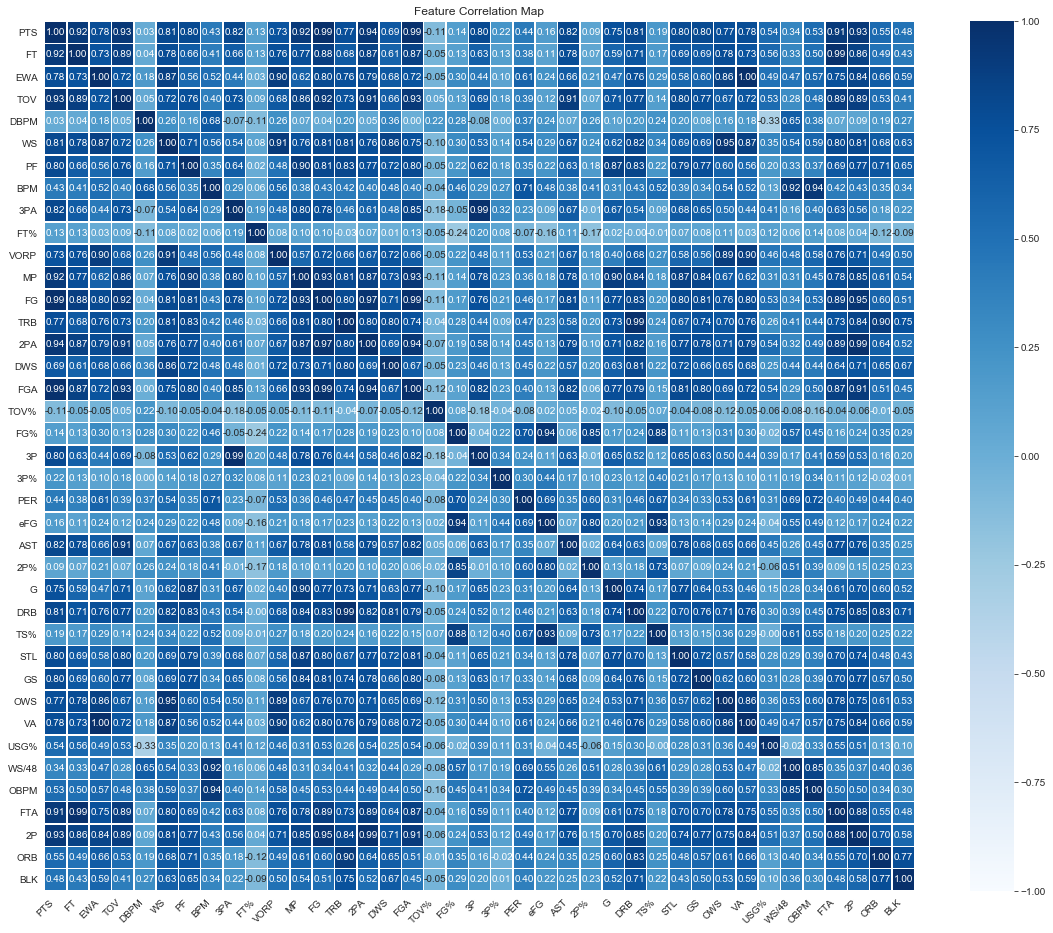

In [37]:
to_heatmap = set(basketballData.columns) - set(['Player', 'Tm' , 'Pos', 'Age'])
corr = basketballData[to_heatmap].corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='Blues',
    square=True, 
    annot=True, fmt='.2f',linewidths=.5, ax=ax
)
ax.set_title('Feature Correlation Map')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

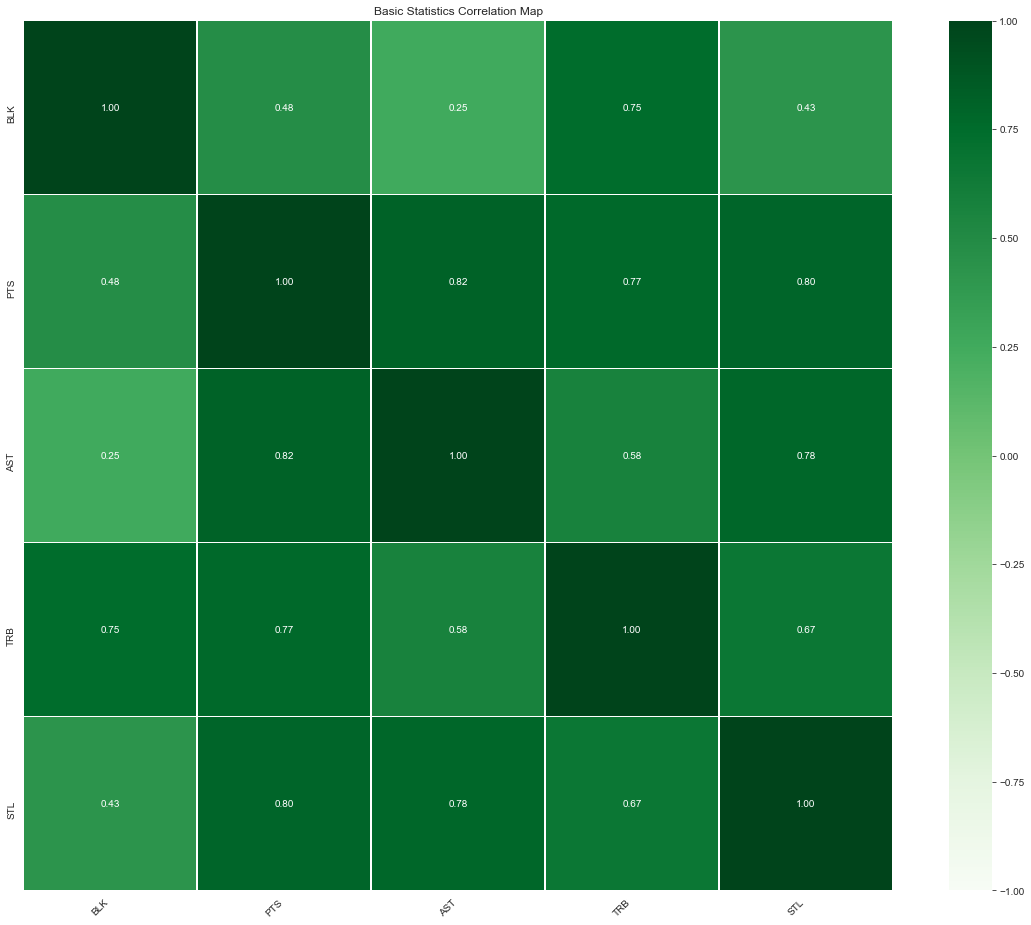

In [38]:
corr = basketballData[basic_stats].corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='Greens',
    square=True, 
    annot=True, fmt='.2f',linewidths=.5, ax=ax
)
ax.set_title('Basic Statistics Correlation Map')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

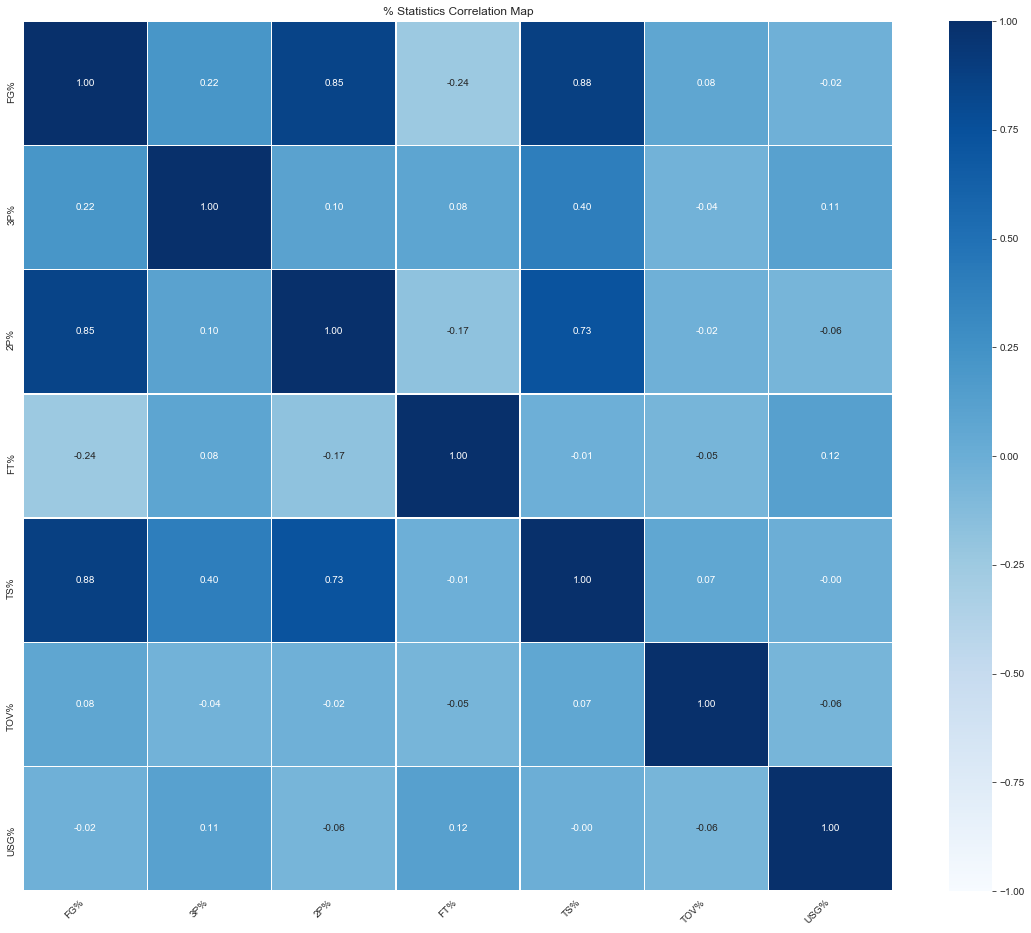

In [39]:
corr = basketballData[keepPercents].corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='Blues',
    square=True, 
    annot=True, fmt='.2f',linewidths=.5, ax=ax
)
ax.set_title('% Statistics Correlation Map')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [40]:
corr.iplot(kind='heatmap',colorscale='Blues',title="Feature Correlation Matrix")

### Scatterplots 

In [41]:
fig = px.scatter(basketballData, x='PTS', y='AST', color = 'Pos', hover_data = ['Player'])
fig.update_layout(title_text = 'Points vs. Assists for 2019-2020 NBA Players')

In [42]:
fig = px.scatter(basketballData, x='PTS', y='STL', color = 'Pos', hover_data = ['Player'])
fig.update_layout(title_text = 'Blocks vs. Steals for 2019-2020 NBA Players')

# Top 20 Graphs and Analysis Metrics

In [43]:
sortedTS = basketballData.sort_values(['TS%'], ascending=False)
sortedTS.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
545,Noah Vonleh,PF,24.0,DEN,4.0,0.0,17.0,3.0,3.0,1.000,1.0,1.0,1.0,2.0,2.0,1.000,1.167,1.0,2.0,0.500,3.0,4.0,7.0,1.0,0.0,0.0,2.0,2.0,8.0,1.03,21.08,2.43,0.1,34.0,15.0,0.1,0.0,0.1,0.185,4.3,-1.6,2.7,0.0
543,Noah Vonleh,PF,24.0,DEN,4.0,0.0,17.0,3.0,3.0,1.000,1.0,1.0,1.0,2.0,2.0,1.000,1.167,1.0,2.0,0.500,3.0,4.0,7.0,1.0,0.0,0.0,2.0,2.0,8.0,1.03,21.08,2.43,0.1,17.0,14.0,0.6,0.4,1.0,0.126,-1.2,0.3,-0.8,0.1
544,Noah Vonleh,PF,24.0,DEN,4.0,0.0,17.0,3.0,3.0,1.000,1.0,1.0,1.0,2.0,2.0,1.000,1.167,1.0,2.0,0.500,3.0,4.0,7.0,1.0,0.0,0.0,2.0,2.0,8.0,1.03,21.08,2.43,0.1,16.2,13.9,0.5,0.3,0.9,0.123,-1.4,0.4,-1.0,0.1
30,Keita Bates-Diop,SF,24.0,DEN,2.0,0.0,19.0,2.0,2.0,1.000,0.0,0.0,0.0,2.0,2.0,1.000,1.000,3.0,4.0,0.750,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,7.0,0.93,9.79,-0.20,-0.0,0.0,8.6,0.1,0.0,0.1,0.218,0.0,0.1,0.0,0.0
29,Keita Bates-Diop,SF,24.0,DEN,2.0,0.0,19.0,2.0,2.0,1.000,0.0,0.0,0.0,2.0,2.0,1.000,1.000,3.0,4.0,0.750,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,7.0,0.93,9.79,-0.20,-0.0,5.6,15.8,0.6,0.5,1.0,0.076,-0.8,-0.1,-0.9,0.2
28,Keita Bates-Diop,SF,24.0,DEN,2.0,0.0,19.0,2.0,2.0,1.000,0.0,0.0,0.0,2.0,2.0,1.000,1.000,3.0,4.0,0.750,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,7.0,0.93,9.79,-0.20,-0.0,5.5,15.6,0.6,0.5,1.1,0.081,-0.8,-0.1,-0.8,0.2
178,Drew Eubanks,PF,22.0,SAS,14.0,3.0,130.0,21.0,28.0,0.750,1.0,1.0,1.0,20.0,27.0,0.741,0.768,8.0,11.0,0.727,8.0,27.0,35.0,5.0,2.0,6.0,10.0,21.0,51.0,0.78,14.22,5.28,0.2,23.3,14.3,0.2,0.1,0.3,0.120,-2.6,-1.0,-3.7,-0.1
454,Shamorie Ponds,PG,21.0,TOR,4.0,0.0,11.0,3.0,5.0,0.600,1.0,2.0,0.5,2.0,3.0,0.667,0.700,2.0,2.0,1.000,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,9.0,0.77,29.09,2.97,0.1,0.0,22.9,0.1,0.0,0.1,0.451,8.4,5.3,13.7,0.0
403,Johnathan Motley,PF,24.0,LAC,13.0,0.0,41.0,11.0,15.0,0.733,1.0,1.0,1.0,10.0,14.0,0.714,0.767,5.0,7.0,0.714,3.0,7.0,10.0,8.0,3.0,0.0,5.0,6.0,28.0,0.77,26.51,9.19,0.3,21.7,23.4,0.2,0.1,0.3,0.299,4.8,3.3,8.1,0.1
385,Eric Mika,PF,25.0,SAC,1.0,0.0,19.0,2.0,3.0,0.667,0.0,0.0,0.0,2.0,3.0,0.667,0.667,2.0,2.0,1.000,2.0,5.0,7.0,0.0,0.0,0.0,0.0,5.0,6.0,0.77,10.46,-0.29,-0.0,0.0,8.9,0.1,0.0,0.1,0.222,-2.2,-0.9,-3.1,0.0


In [44]:
fig = px.bar(sortedTS[:10], x='TS%', y='Player', orientation = 'h', color_discrete_sequence =['green']*10 )
fig.update_layout(
    title="Top 10 True Shooting % Among 2019-2020 NBA Players",
    xaxis_title="True Shooting %",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

In [45]:
sortedPER = basketballData.sort_values(['PER'], ascending=False)
sortedPER.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
454,Shamorie Ponds,PG,21.0,TOR,4.0,0.0,11.0,3.0,5.0,0.600,1.0,2.0,0.500,2.0,3.0,0.667,0.700,2.0,2.0,1.000,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,9.0,0.77,29.09,2.97,0.1,0.0,22.9,0.1,0.0,0.1,0.451,8.4,5.3,13.7,0.0
10,Giannis Antetokounmpo,PF,25.0,MIL,57.0,57.0,1763.0,623.0,1139.0,0.547,83.0,271.0,0.306,540.0,868.0,0.622,0.583,361.0,570.0,0.633,130.0,653.0,783.0,329.0,59.0,58.0,209.0,173.0,1690.0,0.61,28.77,454.43,15.1,13.1,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0
403,Johnathan Motley,PF,24.0,LAC,13.0,0.0,41.0,11.0,15.0,0.733,1.0,1.0,1.000,10.0,14.0,0.714,0.767,5.0,7.0,0.714,3.0,7.0,10.0,8.0,3.0,0.0,5.0,6.0,28.0,0.77,26.51,9.19,0.3,21.7,23.4,0.2,0.1,0.3,0.299,4.8,3.3,8.1,0.1
508,Max Strus,SG,23.0,CHI,2.0,0.0,6.0,2.0,3.0,0.667,0.0,1.0,0.000,2.0,2.0,1.000,0.667,1.0,1.0,1.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.73,25.77,1.37,0.0,0.0,24.4,0.0,0.0,0.0,0.317,5.4,-1.0,4.4,0.0
185,Tacko Fall,C,24.0,BOS,6.0,0.0,24.0,9.0,12.0,0.750,0.0,0.0,0.000,9.0,12.0,0.750,0.750,1.0,3.0,0.333,0.0,11.0,11.0,0.0,0.0,2.0,3.0,5.0,19.0,0.71,25.33,5.28,0.2,18.4,29.0,0.0,0.1,0.1,0.102,-2.0,3.1,1.0,0.0
293,LeBron James,PG,35.0,LAL,60.0,60.0,2094.0,586.0,1176.0,0.498,133.0,381.0,0.349,453.0,795.0,0.570,0.555,239.0,343.0,0.697,59.0,414.0,473.0,636.0,74.0,30.0,239.0,106.0,1544.0,0.58,25.28,446.30,14.9,15.3,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7
383,Chimezie Metu,PF,22.0,SAS,16.0,0.0,73.0,20.0,35.0,0.571,0.0,1.0,0.000,20.0,34.0,0.588,0.571,6.0,8.0,0.750,10.0,16.0,26.0,6.0,1.0,4.0,5.0,4.0,46.0,0.60,24.63,14.31,0.5,11.5,25.9,0.2,0.1,0.2,0.159,3.8,-0.8,3.0,0.1
529,Karl-Anthony Towns,C,24.0,MIN,35.0,35.0,1187.0,316.0,622.0,0.508,114.0,277.0,0.412,202.0,345.0,0.586,0.600,180.0,226.0,0.796,95.0,283.0,378.0,153.0,33.0,42.0,110.0,117.0,926.0,0.64,24.27,242.18,8.1,13.2,28.8,3.8,1.3,5.1,0.205,7.0,0.8,7.8,2.9
282,Kyrie Irving,PG,27.0,BRK,20.0,20.0,658.0,199.0,416.0,0.478,56.0,142.0,0.394,143.0,274.0,0.522,0.546,94.0,102.0,0.922,22.0,81.0,103.0,128.0,27.0,10.0,52.0,53.0,548.0,0.59,24.25,130.13,4.3,10.1,32.6,2.1,0.8,3.0,0.216,6.6,1.0,7.6,1.6
568,Hassan Whiteside,C,30.0,POR,61.0,61.0,1911.0,418.0,676.0,0.618,4.0,7.0,0.571,414.0,669.0,0.619,0.621,153.0,225.0,0.680,244.0,625.0,869.0,74.0,24.0,187.0,117.0,179.0,993.0,0.64,23.61,371.08,12.4,13.1,19.8,5.1,3.0,8.1,0.204,2.5,0.7,3.2,2.5


In [46]:
fig = px.bar(sortedPER[:10], x='PER', y='Player', orientation = 'h', color_discrete_sequence =['green']*10)
fig.update_layout(
    title="Top 10 PER Among 2019-2020 NBA Players",
    xaxis_title="PER",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

In [47]:
PERbottom10 = sortedPER.tail(10)
PERbottom10 = PERbottom10.sort_values(by = 'PER', ascending = True)
fig = px.bar(PERbottom10, x='PER', y='Player', orientation = 'h', color_discrete_sequence =['red']*10)
fig.update_layout(
    title="Bottom 10 PER Among 2019-2020 NBA Players",
    xaxis_title="PER",
    yaxis_title="Player",
    yaxis={'categoryorder':'total descending'}
    )
fig.show()

Let's try 2 more metrics now, Value added (VA) and Estimated wins added (EWA)

In [48]:
sortedEWA = basketballData.sort_values(['EWA'], ascending=False)
sortedEWA.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
10,Giannis Antetokounmpo,PF,25.0,MIL,57.0,57.0,1763.0,623.0,1139.0,0.547,83.0,271.0,0.306,540.0,868.0,0.622,0.583,361.0,570.0,0.633,130.0,653.0,783.0,329.0,59.0,58.0,209.0,173.0,1690.0,0.61,28.77,454.43,15.1,13.1,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0
293,LeBron James,PG,35.0,LAL,60.0,60.0,2094.0,586.0,1176.0,0.498,133.0,381.0,0.349,453.0,795.0,0.570,0.555,239.0,343.0,0.697,59.0,414.0,473.0,636.0,74.0,30.0,239.0,106.0,1544.0,0.58,25.28,446.30,14.9,15.3,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7
305,Nikola Jokić,C,24.0,DEN,65.0,65.0,2101.0,512.0,969.0,0.528,71.0,226.0,0.314,441.0,743.0,0.594,0.565,218.0,268.0,0.813,155.0,508.0,663.0,446.0,77.0,43.0,202.0,200.0,1313.0,0.60,23.45,402.95,13.4,15.7,26.6,6.0,3.2,9.2,0.209,5.4,2.3,7.6,5.1
568,Hassan Whiteside,C,30.0,POR,61.0,61.0,1911.0,418.0,676.0,0.618,4.0,7.0,0.571,414.0,669.0,0.619,0.621,153.0,225.0,0.680,244.0,625.0,869.0,74.0,24.0,187.0,117.0,179.0,993.0,0.64,23.61,371.08,12.4,13.1,19.8,5.1,3.0,8.1,0.204,2.5,0.7,3.2,2.5
235,James Harden,SG,30.0,HOU,61.0,61.0,2241.0,603.0,1386.0,0.435,271.0,769.0,0.352,332.0,617.0,0.538,0.533,619.0,719.0,0.861,64.0,324.0,388.0,450.0,106.0,53.0,273.0,206.0,2096.0,0.62,20.33,328.79,11.0,13.8,36.4,8.7,2.7,11.5,0.245,7.9,1.2,9.0,6.3


In [49]:
fig = px.bar(sortedEWA[:10], x='EWA', y='Player', orientation = 'h', color_discrete_sequence =['green']*10)
fig.update_layout(
    title="Top 10 Estimated Wins Added Among 2019-2020 NBA Players",
    xaxis_title="Estimated Wins Added",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

In [50]:
EWAbottom10 = sortedEWA.tail(10) #bottom 10 players
EWAbottom10 = EWAbottom10.sort_values(by = 'EWA', ascending = True)
fig = px.bar(EWAbottom10, x='EWA', y='Player', orientation = 'h', color_discrete_sequence =['red']*10)
fig.update_layout(
    title="Bottom 10 Estimated Wins Added Among 2019-2020 NBA Players",
    xaxis_title="Estimated Wins Added",
    yaxis_title="Player",
    yaxis={'categoryorder':'total descending'}
    )
fig.show()